In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import fitsio
import scipy.stats #import kstest

In [18]:
raw_list = glob.glob("../daily/entropy_raw_exp_202205*_*.csv")
raw_list.sort()

In [25]:
data = []
for raw_file in raw_list:
    tmp_data = pd.read_csv(raw_file)
    if tmp_data['PROGRAM'][0]=='CALIB Dark 5min':
        tmp_data = tmp_data.sort_values(by=['SPECTRO','AMP'])
        data.append(tmp_data)

In [44]:
summary = {}
summary['SPECTRO'] = list(data[0]['SPECTRO'])
summary['AMP'] = list(data[0]['AMP'])
for i,d in enumerate(data):
    summary[i] = list(data[i]['H'])
    print()
    
summary_df = pd.DataFrame.from_dict(summary)

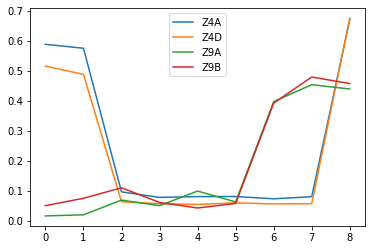

In [106]:
n_days = len(summary_df)
for i in range(n_days):
    
    ent = np.float_(np.array(summary_df.iloc[i][2:n_days]))
    specamp = summary_df.iloc[i]['SPECTRO']+summary_df.iloc[i]['AMP']
    #plt.plot(ent)
    r = (np.mean(ent)+0.01)/(np.std(ent)+0.01)
    if (r<1.1) & (np.mean(ent)>0.1): 
        #plt.scatter(np.mean(ent), np.std(ent))
        plt.plot(ent, label=specamp)
plt.legend()

In [24]:
tmp_data

,Unnamed: 0,SPECTRO,AMP,EXPID,NIGHT,PROGRAM,OBSTYPE,H
0,0,Z2,A,134052,20220509,Morning darks,DARK,0.008212
1,1,Z2,B,134052,20220509,Morning darks,DARK,0.075248
2,2,Z2,C,134052,20220509,Morning darks,DARK,0.026843
3,3,Z2,D,134052,20220509,Morning darks,DARK,0.063100
4,4,R2,A,134052,20220509,Morning darks,DARK,0.013275
...,...,...,...,...,...,...,...,...
115,115,R0,D,134052,20220509,Morning darks,DARK,0.109890
116,116,B0,A,134052,20220509,Morning darks,DARK,0.475133
117,117,B0,B,134052,20220509,Morning darks,DARK,0.282740
118,118,B0,C,134052,20220509,Morning darks,DARK,0.423939
